## Домашнее задание № 4

### Ансамблевые методы 

**Дедлайн: 3.06.2020 0:30** 
Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

**Максимальный балл: 10**

### Работу выполнил Кувайцев Константин

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

### Задание 0

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [2]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [59]:
 data.isna().any().any()

False

В датасете **нет** пропущенных значений.

### Задание 1

**(0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

In [0]:
def find_zeros(data):
    l = data.shape[0]
    columns_nan = []
    values = {
        "Количество нулей": [],
        "В процентах": []
    }
    for i in range(len(data.columns)):
        column = data.columns[i]
        zeros = np.sum(data[column] == 0)
        values["Количество нулей"].append(zeros)
        values["В процентах"].append(zeros / l * 100)
    answer = pd.DataFrame(data=values, index=data.columns)
    return answer

In [61]:
find_zeros(data)

,Количество нулей,В процентах
Pregnancies,111,14.453125
Glucose,5,0.651042
BloodPressure,35,4.557292
SkinThickness,227,29.557292
Insulin,374,48.697917
BMI,11,1.432292
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000
Outcome,500,65.104167


- 0 в колонке **Pregnancies** означает отсутствие беременностей. Никаких преобразований не требуется, ведь если бы там и были пропуски, то они наверняка обозначались каким-то другим символом, а не 0, который можно воспринять как отсутствие беременностей у опрошенных женщин.
- 0 в колонке **Glucose** вызываает подозрения, потому что 0 мг/дл неадекватное значение для такого параметра как уровень сахара. Также сомнений по данному значению добавляет распределние квантилей в данной колонке. Значение первой квантили (25%) - 99, второй (50%) - 117, третей (75%) - 141. По всем этим причинам значение 0 смотрится слишком неправдоподобно. Заменим 0 на среднее значение (благо пропусков всего 0.65%).
- 0 в колонке **BloodPressure** очевидно отвечает за пропущенное значение, потому что давление крови равное нулю довольно трудно представить у человека даже больного диабетом. Заменим на среднее, так как пропусков всего 4.5%.
- 0 в колонке **SkinThickness**. Здесь ситуация немного сложнее. Данный параметр отвечает за толщину (в мм.) складки кожи на трицепсе. Можно предположить, что из-за постоянных физических нагрузок в племени толщина складки настолько мала, что ее можно не учитывать, но я посмотрел довольно много источников по этой теме и нигде не увидел значение 0 мм, а в нашем датасете этих значений целых 29%. Скорее всего 0 в этой колонке отвечает за пропуск значения. Заменим на среднее.
- 0 в колонке **Insulin** отвечает за пропуск, потому что значение 0 у такого параметра как инсулин быть не может, к тому же у такого большого количества людей. Заменить все пропуски на среднее значение будет не лучшей идеей, потому что их 49%, но попробовать стоит. В дальнейшем можно придумать способ получше.
- 0 в колонке **BMI** означает пропуск, так как значение коэффициента, который высчитывается как отношение массы в кг и квадрата роста в метрах, не может быть равно 0, если мы говорим о людях. Заменим пропуски на среднее значение.

In [62]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns:
    data[column] = data[column].replace(0, np.nan)
    data[column] = data[column].replace(np.nan, data[column].mean())
    
find_zeros(data)

,Количество нулей,В процентах
Pregnancies,111,14.453125
Glucose,0,0.000000
BloodPressure,0,0.000000
SkinThickness,0,0.000000
Insulin,0,0.000000
BMI,0,0.000000
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000
Outcome,500,65.104167


### Задание 2

**(1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

In [0]:
def separate(column):
    column_0 = column[data['Outcome'] == 0]
    column_1 = column[data['Outcome'] == 1]
    return column_0, column_1

In [0]:
def histogram(data1, data2, n_bins = 0, data1_name="", data1_color="mediumseagreen", data2_name="", data2_color="brown", x_label="", y_label="", title=""):
    # Create the plot
    _, ax = plt.subplots()
    ax.hist(data1, bins = n_bins, color = data1_color, alpha = 1, label = data1_name)
    ax.hist(data2, bins = n_bins, color = data2_color, alpha = 0.75, label = data2_name)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')

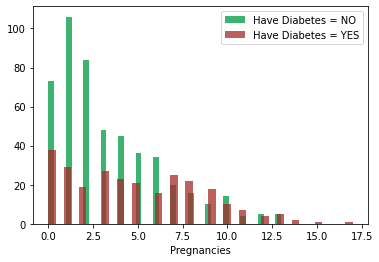

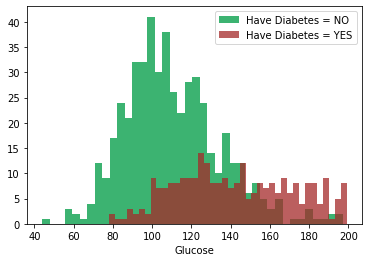

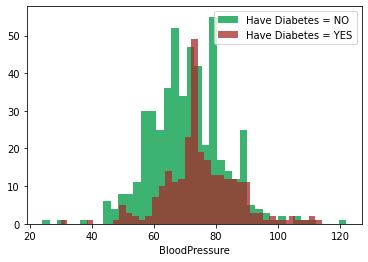

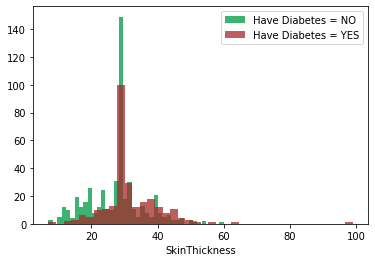

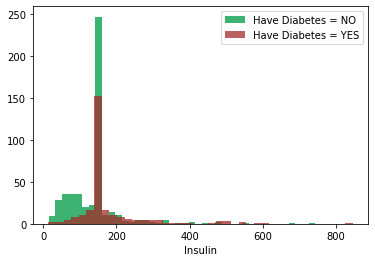

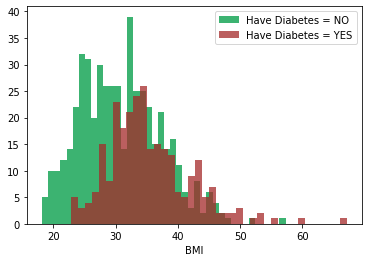

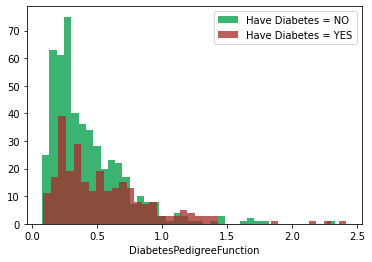

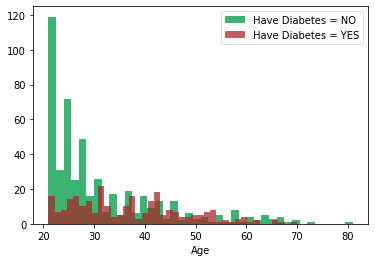

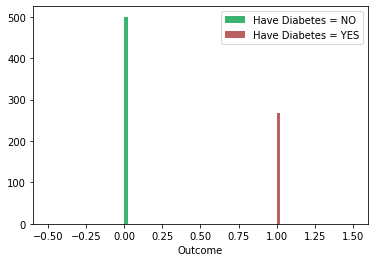

In [65]:
for column in data.columns:
    col_0, col_1 = separate(data[column])
    histogram(col_0, col_1, n_bins=40, data1_name='Have Diabetes = NO', data2_name='Have Diabetes = YES', x_label=column)

In [0]:
y = data['Outcome']
X = data.drop('Outcome', axis=1)

### Задание 3

**(2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите *BaggingClassifier* на деревьях (поставьте параметр *base_estimator = DecisionTreeClassifier()*) и *RandomForest*. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*tip: создайте отдельную функцию для вывода метрик качества;*

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
def metrics(estimator, X_train, y_train, X_test, y_test):
    clf = BaggingClassifier(base_estimator=estimator, n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    
    return accuracy, precision, recall

In [70]:
estimators = [DecisionTreeClassifier(), RandomForestClassifier()]

for estimator in estimators:
    ac, pr, re = metrics(estimator, X_train, y_train, X_test, y_test)
    print('________________', str(estimator).split('(')[0], '________________', sep='')
    print('Accuracy =', ac)
    print('Precision =', pr)
    print('Recall =', re)
    print()

________________DecisionTreeClassifier________________
Accuracy = 0.7272727272727273
Precision = 0.6125
Recall = 0.6049382716049383

________________RandomForestClassifier________________
Accuracy = 0.7445887445887446
Precision = 0.6375
Recall = 0.6296296296296297



RandomForestClassifier показывает лучшие значения метрик, что может быть связано с тем, что в данном алгоритме больше "случайностей" (случайное подмножество объектов и случайное подмножество признаков), что позволяет стабилизировать выборку и избавить ее от сильного влияния выбросов.

### Задание 4

**(2 балл)** Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
* *n_estimators* (можно перебрать около 10 значений из отрезка от 10 до 1500)
* *min_samples_leaf* (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

In [0]:
from sklearn.metrics import plot_roc_curve

In [0]:
models_metrics = {'Accuracy': [], 'Precision': [], 'Recall': []}

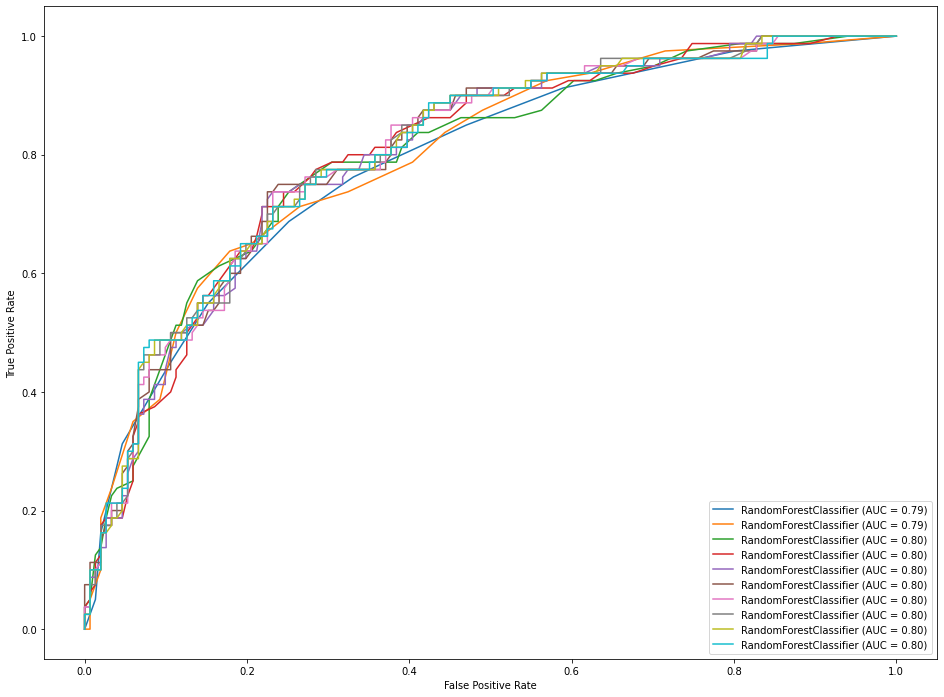

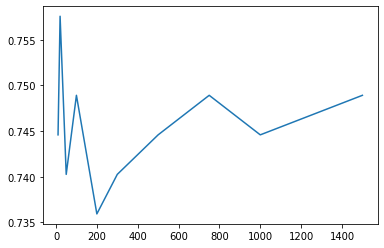

In [73]:
estimators = [10, 20, 50, 100, 200, 300, 500, 750, 1000, 1500]
accuracy = []

for estimator in estimators:
    model = RandomForestClassifier(n_estimators=estimator, random_state=42)
    model.fit(X_train, y_train)        
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)
    if estimator == 10:
        plt.figure(figsize=(16, 12))
        ax = plt.gca()
        roc = plot_roc_curve(model, X_test, y_test, ax=ax)
    else:
        roc = plot_roc_curve(model, X_test, y_test, ax=ax)
plt.show()
plt.plot(estimators, accuracy)
plt.show()

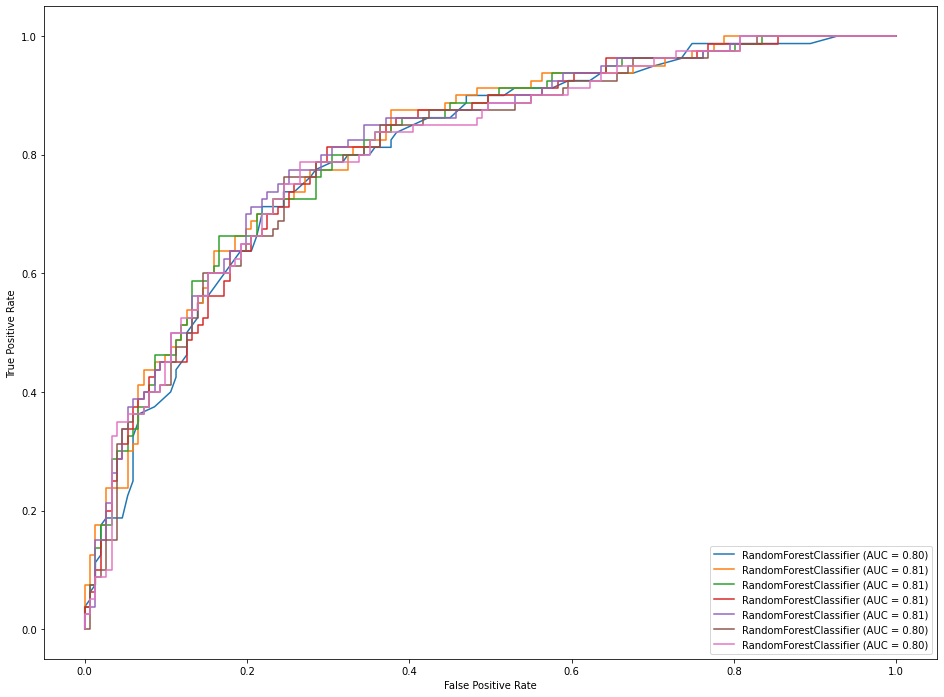

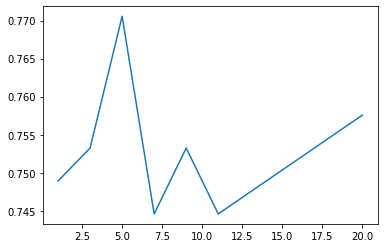

In [74]:
min_samples_leaf = [1, 3, 5, 7, 9, 11, 20]
accuracy = []

for leaf in min_samples_leaf:
    model = RandomForestClassifier(n_estimators=100,min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)        
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)
    if leaf == 1:
        plt.figure(figsize=(16, 12))
        ax = plt.gca()
        roc = plot_roc_curve(model, X_test, y_test, ax=ax)
    else:
        roc = plot_roc_curve(model, X_test, y_test, ax=ax)
plt.show()
plt.plot(min_samples_leaf, accuracy)
plt.show()

**Выводы:** изменение параметров n_estimators и min_samples_leaf не сильно влияет на площадь под ROC кривой, однако оказывает некоторое действие на accuracy. 

### Задание 5

**(1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

<BarContainer object of 8 artists>

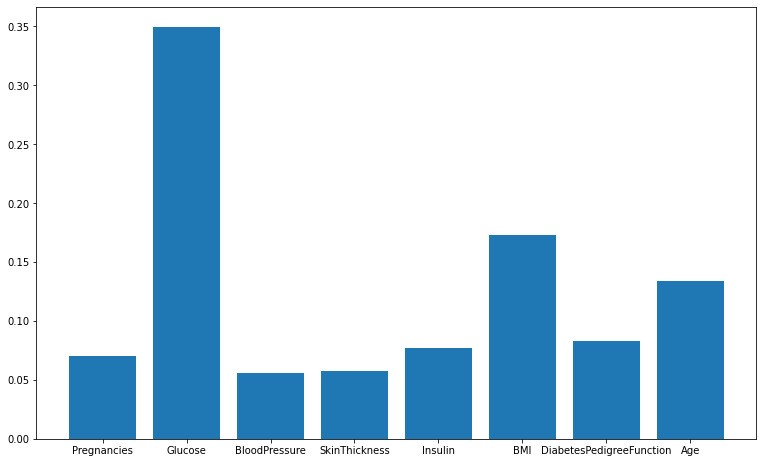

In [75]:
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
models_metrics['Accuracy'].append(accuracy_score(y_pred, y_test))
models_metrics['Precision'].append(precision_score(y_pred, y_test))
models_metrics['Recall'].append(recall_score(y_pred, y_test))
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])
importancies = model.feature_importances_
ax.bar(X.columns, importancies)

Как видно из графика, самым важным оказался признак, содержащий данные о количестве глюкозы, а самым неинформативным оказался признак, содержащий данные о давлении крови. 

### Задание 6

**(2 балла)** Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [0]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

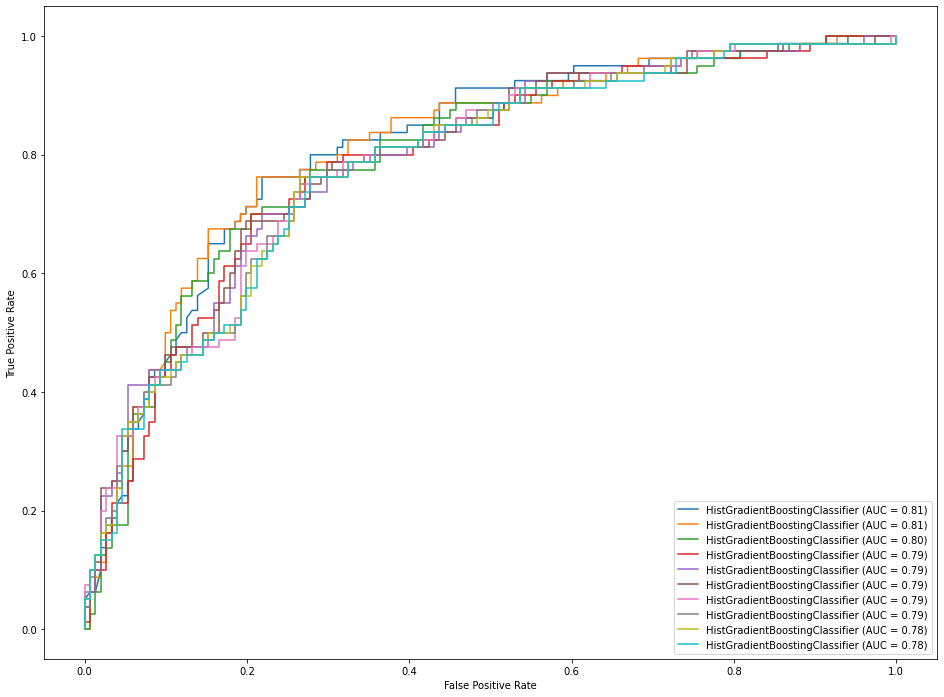

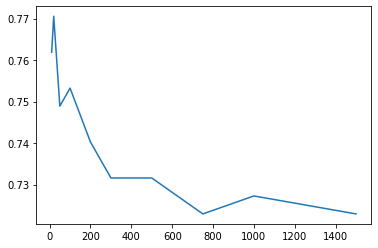

In [77]:
estimators = [10, 20, 50, 100, 200, 300, 500, 750, 1000, 1500]
accuracy = []

for estimator in estimators:
    model = HistGradientBoostingClassifier(max_iter=estimator, random_state=42)
    model.fit(X_train, y_train)        
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)
    if estimator == 10:
        plt.figure(figsize=(16, 12))
        ax = plt.gca()
        roc = plot_roc_curve(model, X_test, y_test, ax=ax)
    else:
        roc = plot_roc_curve(model, X_test, y_test, ax=ax)
plt.show()
plt.plot(estimators, accuracy)
plt.show()

In [0]:
model = HistGradientBoostingClassifier(max_iter=20, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
models_metrics['Accuracy'].append(accuracy_score(y_pred, y_test))
models_metrics['Precision'].append(precision_score(y_pred, y_test))
models_metrics['Recall'].append(recall_score(y_pred, y_test))

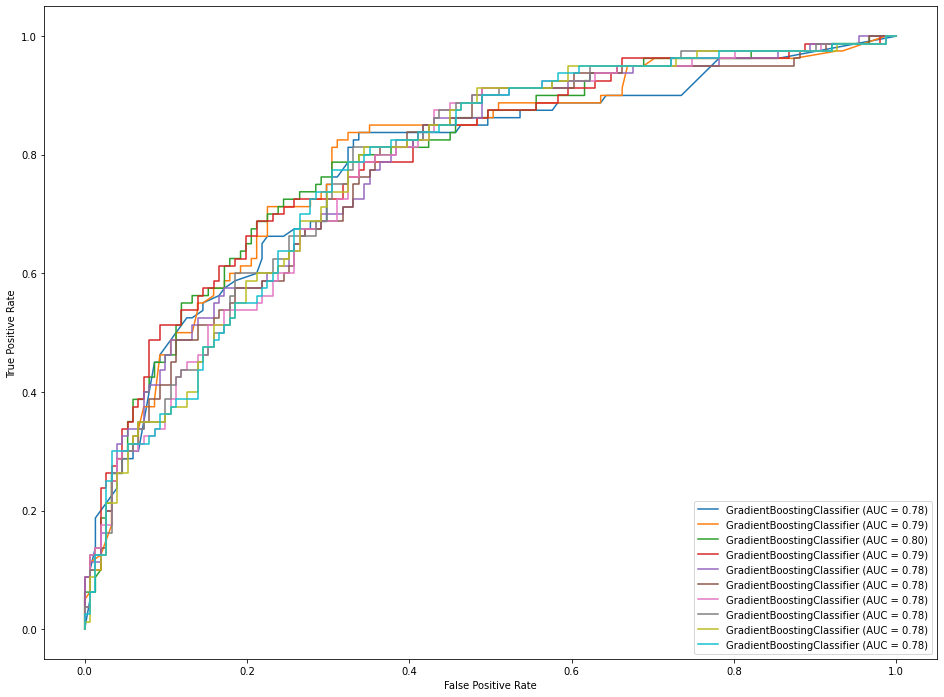

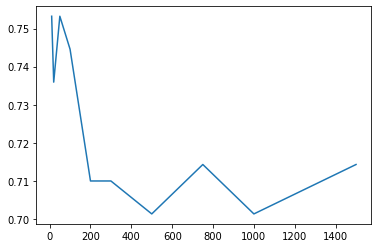

In [79]:
estimators = [10, 20, 50, 100, 200, 300, 500, 750, 1000, 1500]
accuracy = []

for estimator in estimators:
    model = GradientBoostingClassifier(n_estimators=estimator, random_state=42)
    model.fit(X_train, y_train)        
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)
    if estimator == 10:
        plt.figure(figsize=(16, 12))
        ax = plt.gca()
        roc = plot_roc_curve(model, X_test, y_test, ax=ax)
    else:
        roc = plot_roc_curve(model, X_test, y_test, ax=ax)
plt.show()
plt.plot(estimators, accuracy)
plt.show()

In [0]:
model = GradientBoostingClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
models_metrics['Accuracy'].append(accuracy_score(y_pred, y_test))
models_metrics['Precision'].append(precision_score(y_pred, y_test))
models_metrics['Recall'].append(recall_score(y_pred, y_test))

### Задание 7

**(1.5 балла)** Вспомните, что представляет собой [стэкинг моделей](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классфикатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [0]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [0]:
base_learners = [('forest', RandomForestClassifier(n_estimators=100, min_samples_leaf=5, random_state=42)), 
                 ('support_vector_machine', make_pipeline(StandardScaler(),
                          SVC(random_state=42)))]
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
models_metrics['Accuracy'].append(accuracy_score(y_pred, y_test))
models_metrics['Precision'].append(precision_score(y_pred, y_test))
models_metrics['Recall'].append(recall_score(y_pred, y_test))

In [85]:
columns = ['RandomForestClassifier', 'HistGradientBoostingClassifier', 'GradientBoostingClassifier', 'StackingClassifier']
models_metrics = pd.DataFrame(data=models_metrics, index=columns)
models_metrics

,Accuracy,Precision,Recall
RandomForestClassifier,0.770563,0.6625,0.670886
HistGradientBoostingClassifier,0.770563,0.7125,0.655172
GradientBoostingClassifier,0.753247,0.6875,0.632184
StackingClassifier,0.748918,0.6125,0.644737


Качество не увеличилось, что можно объяснить низкой эффективностью метода SVM с текущими настройками.

*tip: не забудьте завести список базовых алгоритмов*
<code>
base_learners = [
                 ('name1', model1(),
                 ('name2', model2())             
                ]

</code>